In [27]:
import csv
import pandas as pd
import numpy as np
import os
import sys
import pylab as plt
import scipy.stats

%pylab inline

datestring = '201603'

#check if the env variable PUIDATA exists
if os.getenv("PUIDATA") is None:
    print ("must set PUIDATA env variable")
    sys.exit()

def getCitiBikeCSV(datestring):
    '''Downloads citibike data and unzips it. If the data is downloaded by not unzippeds it zips it. Moves the data to $PUIDATA
    Arguments:
        date string as yyyymm
    '''
    print ("Downloading", datestring)
    ### First I will heck that it is not already there
    if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.csv"):
        if os.path.isfile(datestring + "-citibike-tripdata.csv"):
            # if in the current dir just move it
            if os.system("mv " + datestring + "-citibike-tripdata.csv " + os.getenv("PUIDATA")):
                print ("Error moving file!, Please check!")
        #otherwise start looking for the zip file
        else:
            if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.zip"):
                if not os.path.isfile(datestring + "-citibike-tripdata.zip"):
                    os.system("curl -O https://s3.amazonaws.com/tripdata/" + datestring + "-citibike-tripdata.zip")
                ###  To move it I use the os.system() functions to run bash commands with arguments
                os.system("mv " + datestring + "-citibike-tripdata.zip " + os.getenv("PUIDATA"))
            ### unzip the csv 
            os.system("unzip " + os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.zip")
            ## NOTE: old csv citibike data had a different name structure. 
            if '2014' in datestring:
                os.system("mv " + datestring[:4] + '-' +  datestring[4:] + 
                          "\ -\ Citi\ Bike\ trip\ data.csv " + datestring + "-citibike-tripdata.csv")
            os.system("mv " + datestring + "-citibike-tripdata.csv " + os.getenv("PUIDATA"))
    ### One final check:
    if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.csv"):
        print ("WARNING!!! something is wrong: the file is not there!")

    else:
        print ("file in place, you can continue")
getCitiBikeCSV(datestring)

Populating the interactive namespace from numpy and matplotlib
('Downloading', '201603')
file in place, you can continue


/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['mean', 'plt']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [ ]:
'''
BELOW I WILL STATE THE NULL HYPOTHESIS
Ho: The ages of CitiBike riders follows a normal distribution
'''

In [2]:
df = pd.read_csv(os.getenv("PUIDATA") + "/" + datestring + '-citibike-tripdata.csv')
#df.drop(df.columns[[1, 2, 3, 4, 5, 7, 8]], axis=1, inplace=True)
df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,1491,3/1/2016 06:52:42,3/1/2016 07:17:33,72,W 52 St & 11 Ave,40.767272,-73.993929,427,Bus Slip & State St,40.701907,-74.013942,23914,Subscriber,1982.0,1
1,1044,3/1/2016 07:05:50,3/1/2016 07:23:15,72,W 52 St & 11 Ave,40.767272,-73.993929,254,W 11 St & 6 Ave,40.735324,-73.998004,23697,Subscriber,1978.0,1
2,714,3/1/2016 07:15:05,3/1/2016 07:26:59,72,W 52 St & 11 Ave,40.767272,-73.993929,493,W 45 St & 6 Ave,40.756800,-73.982912,21447,Subscriber,1960.0,2
3,329,3/1/2016 07:26:04,3/1/2016 07:31:34,72,W 52 St & 11 Ave,40.767272,-73.993929,478,11 Ave & W 41 St,40.760301,-73.998842,22351,Subscriber,1986.0,1
4,1871,3/1/2016 07:31:30,3/1/2016 08:02:41,72,W 52 St & 11 Ave,40.767272,-73.993929,151,Cleveland Pl & Spring St,40.722104,-73.997249,20985,Subscriber,1978.0,1


In [3]:
df['age'] = 2016 - df['birth year']
df.head()
df.describe()

/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,tripduration,start station id,start station latitude,start station longitude,end station id,end station latitude,end station longitude,bikeid,birth year,gender,age
count,9.199210e+05,919921.000000,919921.000000,919921.000000,919921.000000,919921.000000,919921.000000,919921.000000,826678.000000,919921.000000,826678.000000
mean,1.019790e+03,859.263433,40.737532,-73.987185,846.843358,40.736470,-73.985822,19784.809244,1976.775033,1.103705,39.224967
std,1.011213e+04,1019.067653,0.021881,0.015512,1008.252325,0.186417,0.336602,2980.643329,11.788491,0.547556,11.788491
min,6.100000e+01,72.000000,40.678907,-74.017134,72.000000,0.000000,-74.059503,14529.000000,1885.000000,0.000000,16.000000
25%,3.640000e+02,327.000000,40.722104,-73.997901,326.000000,40.722104,-73.998102,17186.000000,NaN,1.000000,NaN
50%,5.930000e+02,448.000000,40.739017,-73.988900,446.000000,40.738274,-73.989111,19807.000000,NaN,1.000000,NaN
75%,1.001000e+03,521.000000,40.752062,-73.977910,520.000000,40.751873,-73.978059,22657.000000,NaN,1.000000,NaN
max,2.825827e+06,3246.000000,40.787209,-73.929891,3246.000000,40.787209,0.000000,24773.000000,2000.000000,2.000000,131.000000


In [4]:
df.columns

Index([u'tripduration', u'starttime', u'stoptime', u'start station id',
       u'start station name', u'start station latitude',
       u'start station longitude', u'end station id', u'end station name',
       u'end station latitude', u'end station longitude', u'bikeid',
       u'usertype', u'birth year', u'gender', u'age'],
      dtype='object')

In [5]:
df.dropna(inplace=True)
#df = df[np.isfinite(df['age'])]
df_dropped = df.drop([u'tripduration', u'starttime', u'stoptime', u'start station id',
       u'start station name', u'start station latitude',
       u'start station longitude', u'end station id', u'end station name',
       u'end station latitude', u'end station longitude', u'bikeid',
       u'usertype', u'birth year'], axis=1)
#df_dropped.head()
df=df.rename(columns = {'gender':'num_ppl'})

In [6]:
df_under100 = df[df['age'] < 90]

In [7]:
grouped_bike_df = df_under100.groupby(df['age']).count()

In [8]:
grouped_bike_df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,num_ppl,age
age,,,,,,,,,,,,,,,,
16.0,47,47,47,47,47,47,47,47,47,47,47,47,47,47,47,47
17.0,850,850,850,850,850,850,850,850,850,850,850,850,850,850,850,850
18.0,1930,1930,1930,1930,1930,1930,1930,1930,1930,1930,1930,1930,1930,1930,1930,1930
19.0,2088,2088,2088,2088,2088,2088,2088,2088,2088,2088,2088,2088,2088,2088,2088,2088
20.0,4367,4367,4367,4367,4367,4367,4367,4367,4367,4367,4367,4367,4367,4367,4367,4367


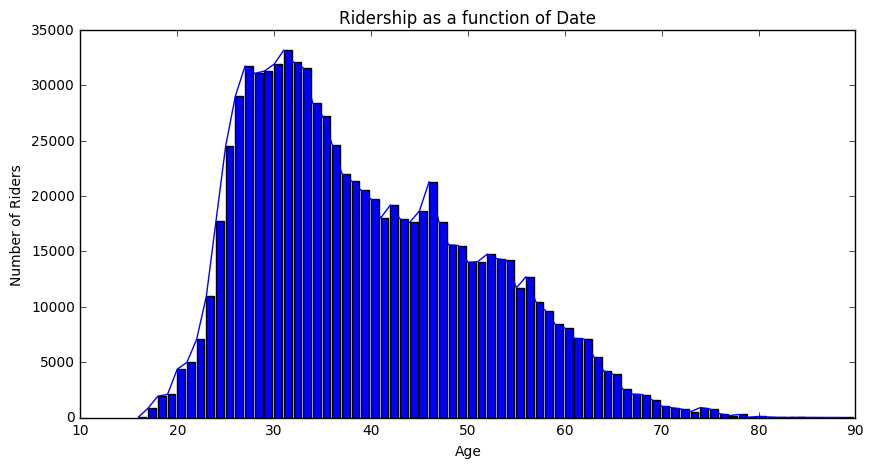

In [31]:
plt.figure(figsize=(10, 5))
plt.title('Ridership as a function of Date')
plt.xlabel('Age')
plt.ylabel('Number of Riders')
plt.plot(np.array(grouped_bike_df.index), np.array(grouped_bike_df['num_ppl']))
plt.bar(np.array(grouped_bike_df.index), np.array(grouped_bike_df['num_ppl']))
plt.show()

In [28]:
mean = grouped_bike_df.num_ppl.mean()
std_dev = grouped_bike_df.num_ppl.std()
scipy.stats.kstest(grouped_bike_df.num_ppl, 'norm', args=(mean, std_dev))

KstestResult(statistic=0.14749865412892083, pvalue=0.08572367974275652)

In [30]:
scipy.stats.anderson(grouped_bike_df['num_ppl'], dist='norm')

AndersonResult(statistic=2.4022536960756469, critical_values=array([ 0.548,  0.624,  0.748,  0.873,  1.038]), significance_level=array([ 15. ,  10. ,   5. ,   2.5,   1. ]))

In [ ]:
'''
BELOW I WILL MAKE A CONCLUSION ABOUT REJECTION OF THE NULL HYPOTHESIS

According to both of the statistical tests we ran on the the CitiBike ridership data 
from March, 2016 we are not able to reject the null hypothesis that the CitiBike 
ridership follows a normal distribution.
'''